In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


df1 = pd.read_csv("/content/drive/MyDrive/CMSC320/Dataset Generation (2024) (Responses) - Form Responses 1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/CMSC320/Dataset Generation (Fardina) (Responses) - Form Responses 1.csv")
df3 = pd.read_csv("/content/drive/MyDrive/CMSC320/Dataset Generation (Max) (Responses) - Form Responses 1.csv")
df4 = pd.read_csv("/content/drive/MyDrive/CMSC320/Dataset Generation (Spring 2025) (Responses) - Form Responses 1.csv")

In [ ]:
# Visualize the questions in each dataset.
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)

Index(['Timestamp', 'What year are you?', 'How old are you?',
       'You could describe the adults you grew up with as...',
       'You could describe yourself as...',
       'How would you rate your religiousness?',
       'What bests represents your gender?',
       'My boyfriend is a doctor. Lately he's been complaining about pain in his right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told him he needs to see someone about it but he told me it was fine. So I told him that if this is how he treats herself, I'd be concerned about being his patient. He was shocked and told me that was uncalled for. Am I a jerk?',
       'My son is getting married soon. Due to a complicated past, we've only just met recently. We've been building a relationship the last few years though and I am lucky to have him in my life now. Recently, he asked me to do a reading with his father while I am honored I told him no. His step-moth

In [ ]:
# Fix typos: LBGTQ \n, Wife pregnant Am I jerk

df2 = df2.rename(columns={"\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?" : "Some of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?"})
df3 = df3.rename(columns={"\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?" : "Some of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?"})

df1 = df1.rename(columns={"My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?" : "My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I a jerk?"})
df2 = df2.rename(columns={"My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?" : "My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I a jerk?"})
df4 = df4.rename(columns={"My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?" : "My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I a jerk?"})


In [ ]:
df3['What bests represents your gender?'].value_counts()

,count
What bests represents your gender?,
Male,69
Female,15
Non-binary / other,6
Famale,5
Prefer not to say,3


In [ ]:
df4['What year are you?'].value_counts()

,count
What year are you?,
Sophmore,59
Junior,19
Senior,8
Graduate Student,3
Freshman,3


In [ ]:
# Ensures there are no duplicates in the datasets.
print(len(df1) == len(df1.drop_duplicates()))
print(len(df2) == len(df2.drop_duplicates()))
print(len(df3) == len(df3.drop_duplicates()))
print(len(df4) == len(df4.drop_duplicates()))

True
True
True
True


In [ ]:
df = pd.concat([df1,df2,df3,df4])
print(df.head())
df.columns

           Timestamp What year are you? How old are you?  \
0  9/17/2024 9:28:55             Junior             19.0   
1  9/17/2024 9:29:12             Junior             19.0   
2  9/17/2024 9:29:22           Sophmore             18.0   
3  9/17/2024 9:29:41             Senior              NaN   
4  9/17/2024 9:30:06           Sophmore             19.0   

  You could describe the adults you grew up with as...  \
0                                Mildly conservative     
1                                            Neutral     
2                      Don't know / It's complicated     
3                                            Neutral     
4                                     Mildly liberal     

  You could describe yourself as... How would you rate your religiousness?  \
0                  Strongly liberal                     Somewhat religious   
1                    Mildly liberal                     Strongly religious   
2     Don't know / It's complicated                   No

Index(['Timestamp', 'What year are you?', 'How old are you?',
       'You could describe the adults you grew up with as...',
       'You could describe yourself as...',
       'How would you rate your religiousness?',
       'What bests represents your gender?',
       'My boyfriend is a doctor. Lately he's been complaining about pain in his right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told him he needs to see someone about it but he told me it was fine. So I told him that if this is how he treats herself, I'd be concerned about being his patient. He was shocked and told me that was uncalled for. Am I a jerk?',
       'My son is getting married soon. Due to a complicated past, we've only just met recently. We've been building a relationship the last few years though and I am lucky to have him in my life now. Recently, he asked me to do a reading with his father while I am honored I told him no. His step-moth

In [ ]:
# Change column names to make it easier to work with
df.columns = ['Time', 'Year', 'Age', 'Parental Political Ideology', 'Self Political Ideology',
              'Religiousness', 'Gender', "Q1", "Q2", "Q3",
              "Q4", "Q5", "Q6",
              "Q7", "Q8", "Q9",
              "Q10", "Q11", "Q12",
              "Q13", "Q14", "Spirituality", "Compassionate",
              "Q15", "Q16", "Q17",
              "Q18", "Q19", "Q20",
              "Q21", "Q22",
              "Q23", "Q24", "Q25"]
df.head()

,Time,Year,Age,Parental Political Ideology,Self Political Ideology,Religiousness,Gender,Q1,Q2,Q3,...,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25
0,9/17/2024 9:28:55,Junior,19.0,Mildly conservative,Strongly liberal,Somewhat religious,Male,Not a jerk,Mildly a jerk,Strongly a jerk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/17/2024 9:29:12,Junior,19.0,Neutral,Mildly liberal,Strongly religious,Male,Not a jerk,Not a jerk,Mildly a jerk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9/17/2024 9:29:22,Sophmore,18.0,Don't know / It's complicated,Don't know / It's complicated,Not religious at all,Male,Not a jerk,Not a jerk,Not a jerk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9/17/2024 9:29:41,Senior,NaN,Neutral,Neutral,Somewhat religious,Female,Not a jerk,Not a jerk,Not a jerk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9/17/2024 9:30:06,Sophmore,19.0,Mildly liberal,Mildly liberal,Somewhat religious,Female,Not a jerk,Not a jerk,Mildly a jerk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Fix gender typo (Famale -> Female)
print(df['Gender'].value_counts())
df['Gender'] = df['Gender'].apply(lambda x : 'Female' if x == 'Famale' else x)
print(df['Gender'].value_counts())

Gender
Male                  341
Female                 96
Non-binary / other     10
Famale                  9
Prefer not to say       5
Name: count, dtype: int64
Gender
Male                  341
Female                105
Non-binary / other     10
Prefer not to say       5
Name: count, dtype: int64


In [ ]:
df['Gender'] = df['Gender'].fillna("No Gender Entry")
df['Gender'].value_counts()

,count
Gender,
Male,341
Female,105
No Gender Entry,12
Non-binary / other,10
Prefer not to say,5


In [ ]:
# Seeing if there's anything weird about duplicate time stamps
print(df['Time'].value_counts())

print(df[df['Time'] == '9/17/2024 9:40:27'])
print(df[df['Time'] == '9/23/2023 18:10:13'])
print(df[df['Time'] == '9/23/2023 18:02:48'])

Time
9/17/2024 9:40:27     2
9/23/2023 18:10:13    2
9/23/2023 18:02:48    2
9/25/2023 14:05:43    1
9/25/2023 13:07:51    1
                     ..
9/24/2023 16:23:21    1
9/24/2023 12:34:03    1
9/24/2023 2:31:17     1
9/24/2023 1:31:16     1
9/25/2023 14:40:37    1
Name: count, Length: 470, dtype: int64
                 Time    Year   Age Parental Political Ideology  \
28  9/17/2024 9:40:27  Junior  19.0              Mildly liberal   
29  9/17/2024 9:40:27  Junior  20.0                     Neutral   

   Self Political Ideology         Religiousness Gender             Q1  \
28        Strongly liberal  Not religious at all   Male  Mildly a jerk   
29                 Neutral    Strongly religious   Male     Not a jerk   

            Q2             Q3  ...  Q16  Q17  Q18  Q19  Q20  Q21  Q22  Q23  \
28  Not a jerk  Mildly a jerk  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
29  Not a jerk     Not a jerk  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    Q24  Q25  
28  NaN  NaN  
29

In [ ]:
df['Spirituality'] = df['Spirituality'].fillna("No Spirituality Entry")
df['Religiousness'] = df['Religiousness'].fillna("No Religion Entry")

df['Spirituality'][df['Religiousness'] == "No Religion Entry"]

,Spirituality
129,No Spirituality Entry
0,Not spiritual at all
1,Not spiritual at all
2,Somewhat spiritual
3,Not spiritual at all
...,...
99,Somewhat spiritual
100,Not spiritual at all
101,No Spirituality Entry
102,No Spirituality Entry


Show that 'Regiliousness' and  'Spirituality' are basically identcial. An additional 2 sample t-test would be helpful to validate this claim. If an insignifcant p-value, I should combine the two columns.

In [ ]:
df['Spirituality'] = df['Spirituality'].apply(lambda x :
                                              x.replace('No Spirituality Entry', 'No Religion Entry')
                                              .replace('Not spiritual at all', 'Not religious at all')
                                              .replace('Somewhat spiritual', 'Somewhat religious')
                                              .replace('Strongly spiritual','Strongly religious'))
df['Spirituality'].value_counts()

,count
Spirituality,
No Religion Entry,236
Not religious at all,107
Somewhat religious,92
Strongly religious,38


In [ ]:
# 2-sample t-test to see if there's any reason to believe spirituality and religiousness are different
print(df['Spirituality'].value_counts())
print(df['Religiousness'].value_counts())

stats.ks_2samp(df['Spirituality'], df['Religiousness'], alternative='two-sided')
# p-value: 0.993
# We don't reject the null (spirituality=religiousness)

Spirituality
No Religion Entry       236
Not religious at all    107
Somewhat religious       92
Strongly religious       38
Name: count, dtype: int64
Religiousness
No Religion Entry       249
Not religious at all    105
Somewhat religious       94
Strongly religious       25
Name: count, dtype: int64


KstestResult(statistic=np.float64(0.02748414376321353), pvalue=np.float64(0.9941557569272313), statistic_location='No Religion Entry', statistic_sign=np.int8(-1))

In [ ]:
# Combine self political ideology into Liberal, Conservative, Other
df['Self Political Ideology'] = df['Self Political Ideology'].fillna('No Political Entry')
print(df['Self Political Ideology'].value_counts())

df['Liberal/Conservative'] = df['Self Political Ideology'].apply(lambda x : 'Liberal'
                                                                 if (x == 'Mildly liberal' or x == 'Strongly liberal')
                                                                 else 'Conservative' if
                                                                  (x == 'Strongly conservative' or x == 'Mildly conservative')
                                                                  else 'Other')
print(df['Liberal/Conservative'].value_counts())

Self Political Ideology
Mildly liberal                   176
Neutral                          104
Strongly liberal                  83
Mildly conservative               57
Don't know / It's complicated     27
Strongly conservative             13
No Political Entry                13
Name: count, dtype: int64
Liberal/Conservative
Liberal         259
Other           144
Conservative     70
Name: count, dtype: int64


In [ ]:
# Combine gender into Female, Male, Other
print(df['Gender'].value_counts())

df['Male/Female'] = df['Gender'].apply(lambda x : 'Male' if x == 'Male' else 'Female' if x == 'Female' else 'Other')
print(df['Male/Female'].value_counts())

Gender
Male                  341
Female                105
No Gender Entry        12
Non-binary / other     10
Prefer not to say       5
Name: count, dtype: int64
Male/Female
Male      341
Female    105
Other      27
Name: count, dtype: int64


In [ ]:
print(df['Spirituality'].value_counts())
print(df['Religiousness'].value_counts())

df['Spirituality_numeric'] = df['Spirituality'].apply(lambda x : 1 if
                                                      x == 'Somewhat religious' or x == 'Strongly religious'
                                                      else 2 if x == 'Not religious at all' else 0)
print(df['Spirituality_numeric'].value_counts())

df['Religiousness_numeric'] = df['Religiousness'].apply(lambda x : 1 if
                                                        x == 'Somewhat religious' or x == 'Strongly religious'
                                                        else 2 if x == 'Not religious at all' else 0)
print(df['Religiousness_numeric'].value_counts())

df['Relig_numeric'] = df['Religiousness_numeric'] + df['Spirituality_numeric']
print(df['Relig_numeric'].value_counts())

# make it back to a categorical
df['Relig'] = df['Relig_numeric'].apply(lambda x : 'Not religious at all' if
                                        x == 2 else 'At least somewhat religious' if
                                        x == 1 else 'No religion entry')
print(df['Relig'].value_counts())

Spirituality
No Religion Entry       236
Not religious at all    107
Somewhat religious       92
Strongly religious       38
Name: count, dtype: int64
Religiousness
No Religion Entry       249
Not religious at all    105
Somewhat religious       94
Strongly religious       25
Name: count, dtype: int64
Spirituality_numeric
0    236
1    130
2    107
Name: count, dtype: int64
Religiousness_numeric
0    249
1    119
2    105
Name: count, dtype: int64
Relig_numeric
1    249
2    212
0     12
Name: count, dtype: int64
Relig
At least somewhat religious    249
Not religious at all           212
No religion entry               12
Name: count, dtype: int64


In [ ]:
# Converting all jerk questions into numeric
for i in range(1,26):
  df[f'Q{i}'] = df[f'Q{i}'].fillna("No Entry")
  df[f'Q{i}_numeric'] = df[f'Q{i}'].apply(lambda x : 1 if x == 'Not a jerk'
                                          else 2 if x == 'Mildly a jerk' else 3 if
                                          x == 'Strongly a jerk' else 0)
  df[f'Q{i}_answered'] = df[f'Q{i}'].apply(lambda x : 0 if x == 'No Entry' else 1)
df['Q12_numeric'].value_counts()
df['Q12_answered'].value_counts()


# Creating the Total_jerk_score column
df['Total_jerk_score'] = df['Q1_numeric'] + df['Q2_numeric'] + df['Q3_numeric'] + df['Q4_numeric'] + df['Q5_numeric'] + df['Q6_numeric'] + df['Q7_numeric'] + df['Q8_numeric'] + df['Q9_numeric'] + df['Q10_numeric'] + df['Q11_numeric'] + df['Q12_numeric'] + df['Q13_numeric'] + df['Q14_numeric'] + df['Q15_numeric'] + df['Q16_numeric'] + df['Q17_numeric'] + df['Q18_numeric'] + df['Q19_numeric'] + df['Q20_numeric'] + df['Q21_numeric'] + df['Q22_numeric'] + df['Q23_numeric'] + df['Q24_numeric'] + df['Q25_numeric']
print(df['Total_jerk_score'].value_counts())


# Creating num_questions_answered in prep for avg_jerk_score
df['num_questions_answered'] = df['Q1_answered'] + df['Q2_answered'] + df['Q3_answered'] + df['Q4_answered'] + df['Q5_answered'] + df['Q6_answered'] + df['Q7_answered'] + df['Q8_answered'] + df['Q9_answered'] + df['Q10_answered'] + df['Q11_answered'] + df['Q12_answered'] + df['Q13_answered'] + df['Q14_answered'] + df['Q15_answered'] + df['Q16_answered'] + df['Q17_answered'] + df['Q18_answered'] + df['Q19_answered'] + df['Q20_answered'] + df['Q21_answered'] + df['Q22_answered'] + df['Q23_answered'] + df['Q24_answered'] + df['Q25_answered']
print(df['num_questions_answered'].value_counts())


# Only keep the rows with at least half of the questions answered (7)
df = df[df['num_questions_answered'] >= 7]
print(df['num_questions_answered'].value_counts())


# Creating avg_jerk_score
# avg_jerk_score will be on a scale of 1-3 (inclusive). 1=not a jerk and 3=strongly a jerk.
df['avg_jerk_score'] = df['Total_jerk_score']/df['num_questions_answered']
print(df['avg_jerk_score'].value_counts())

Total_jerk_score
24    60
22    53
25    49
23    44
26    43
28    39
27    30
29    28
21    22
20    20
30    13
31    12
0     11
19     9
18     9
32     7
34     4
14     3
7      3
33     3
6      1
15     1
35     1
39     1
13     1
42     1
17     1
11     1
12     1
36     1
40     1
Name: count, dtype: int64
num_questions_answered
14    427
13     20
0      11
12      5
10      3
4       2
2       1
6       1
8       1
5       1
9       1
Name: count, dtype: int64
num_questions_answered
14    427
13     20
12      5
10      3
8       1
9       1
Name: count, dtype: int64
avg_jerk_score
1.714286    59
1.571429    49
1.785714    45
1.642857    42
2.000000    41
1.857143    40
1.928571    30
2.071429    26
1.500000    21
1.428571    18
2.142857    13
2.214286    12
1.357143     7
1.285714     7
2.285714     7
2.428571     4
1.000000     3
1.692308     3
2.357143     3
2.230769     2
2.083333     2
1.538462     2
1.923077     2
1.461538     2
1.615385     2
1.875000     1
2.100

<ipython-input-185-4ad3dd0b02ec>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_jerk_score'] = df['Total_jerk_score']/df['num_questions_answered']


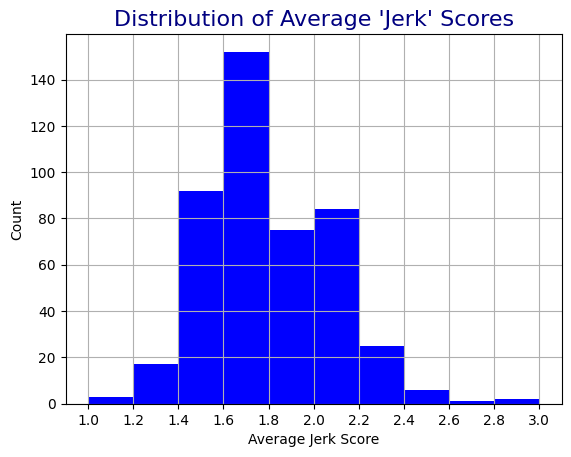

In [ ]:
# Visualizing avg_jerk_score
n, bins, patches = plt.hist(df['avg_jerk_score'], color='blue')
plt.title("Distribution of Average 'Jerk' Scores", color='navy', size=16)
plt.xticks(bins)
plt.ylabel('Count')
plt.xlabel('Average Jerk Score')
plt.grid()

In [ ]:
# Seeing difference in means
print(df.groupby('Relig')['avg_jerk_score'].mean())
print(df.groupby('Liberal/Conservative')['avg_jerk_score'].mean())
print(df.groupby('Male/Female')['avg_jerk_score'].mean())

Relig
At least somewhat religious    1.812059
No religion entry              1.857143
Not religious at all           1.771397
Name: avg_jerk_score, dtype: float64
Liberal/Conservative
Conservative    1.827567
Liberal         1.794234
Other           1.774732
Name: avg_jerk_score, dtype: float64
Male/Female
Female    1.773487
Male      1.793201
Other     1.938244
Name: avg_jerk_score, dtype: float64


Simply looking at the means grouped by our variables, it seems that religion has the greatest correlation to avg_jerk_score (we do not know if it's signifcant yet).
1. Religion: 0.040662 difference
2. Political: 0.033333 difference
3. Gender: 0.019714 difference


TtestResult(statistic=np.float64(1.629427930455863), pvalue=np.float64(0.10391759748918437), df=np.float64(453.0))
TtestResult(statistic=np.float64(1.629427930455863), pvalue=np.float64(0.05195879874459219), df=np.float64(453.0))


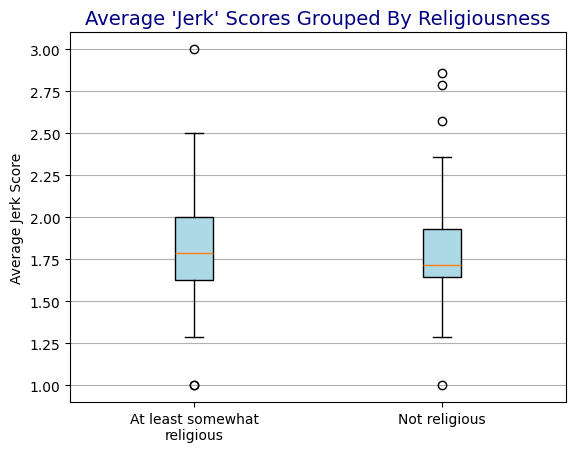

In [ ]:
# Run a 2-sample hypothesis test testing to see if the avg_jerk_score of at
# least somewhat religous differs from the score of not religious at all

avg_score_Relig = df['avg_jerk_score'][df['Relig'] == 'At least somewhat religious']
avg_score_NoRelig = df['avg_jerk_score'][df['Relig'] == 'Not religious at all']
print(stats.ttest_ind(avg_score_Relig, avg_score_NoRelig, alternative='two-sided'))
# p-value = 0.104

# When running one sided "greater":
# Null: relig score = no relig score
# Alternative: relig score > no relig score
print(stats.ttest_ind(avg_score_Relig, avg_score_NoRelig, alternative='greater'))
# p-value = 0.052


# Visualizing the result
plots = plt.boxplot([avg_score_Relig, avg_score_NoRelig], orientation='vertical',
                    patch_artist=True, tick_labels=["At least somewhat\nreligious", "Not religious"])

for patch in plots['boxes']:
    patch.set_facecolor('lightblue')

plt.title("Average 'Jerk' Scores Grouped By Religiousness", color="navy", size=14)
plt.ylabel("Average Jerk Score")
plt.grid(axis='y')

In [ ]:
# Run a 2-sample hypothesis test testing to see if the avg_jerk_score of Conservatives
# differs from the score of Liberals

# Alternative: conservative score > liberal score
avg_score_conservative = df['avg_jerk_score'][df['Liberal/Conservative'] == 'Conservative']
avg_score_liberal = df['avg_jerk_score'][df['Liberal/Conservative'] == 'Liberal']
stats.ttest_ind(avg_score_conservative, avg_score_liberal, alternative='greater')

TtestResult(statistic=np.float64(0.9759848849941716), pvalue=np.float64(0.1649000405821846), df=np.float64(324.0))

In [ ]:
# Run a 2-sample hypothesis test testing to see if the avg_jerk_score of Males
# differs from the score of Females

# Alternative: male score > female score
avg_score_male = df['avg_jerk_score'][df['Male/Female'] == 'Male']
avg_score_female = df['avg_jerk_score'][df['Male/Female'] == 'Female']
stats.ttest_ind(avg_score_male, avg_score_female, alternative='greater')

TtestResult(statistic=np.float64(0.6833472333203726), pvalue=np.float64(0.24737397168420072), df=np.float64(439.0))

In [ ]:
# Do the same for parental political ideology

# Convert to binary and other
df['Parental Political Ideology'] = df['Parental Political Ideology'].fillna('No Political Entry')
df['parent_Liberal/Conservative'] = df['Parental Political Ideology'].apply(lambda x : 'Liberal' if
 (x == 'Mildly liberal' or x == 'Strongly liberal') else 'Conservative' if
  (x == 'Strongly conservative' or x == 'Mildly conservative') else 'Other')
print(df['parent_Liberal/Conservative'].value_counts())

# See means
print(df.groupby('parent_Liberal/Conservative')['avg_jerk_score'].mean())

# t-test
# Alternative: pconservative score < pliberal score
avg_score_pconservative = df['avg_jerk_score'][df['parent_Liberal/Conservative'] == 'Conservative']
avg_score_pliberal = df['avg_jerk_score'][df['parent_Liberal/Conservative'] == 'Liberal']
print(stats.ttest_ind(avg_score_pconservative, avg_score_pliberal, alternative='less'))

parent_Liberal/Conservative
Conservative    181
Liberal         153
Other           123
Name: count, dtype: int64
parent_Liberal/Conservative
Conservative    1.800047
Liberal         1.808024
Other           1.766726
Name: avg_jerk_score, dtype: float64
TtestResult(statistic=np.float64(-0.26603502000336887), pvalue=np.float64(0.3951886863874531), df=np.float64(332.0))


Year
Junior              229
Sophmore            122
Senior               71
Graduate Student     24
Freshman              5
Other                 5
Name: count, dtype: int64
FreSop/JunSen
Jun/Sen    300
Fre/Sop    127
Other       30
Name: count, dtype: int64
FreSop/JunSen
Fre/Sop    1.768250
Jun/Sen    1.804264
Other      1.796551
Name: avg_jerk_score, dtype: float64
TtestResult(statistic=np.float64(-1.3249780977814511), pvalue=np.float64(0.09294516655711961), df=np.float64(425.0))


{'whiskers': [<matplotlib.lines.Line2D at 0x7dece9d2f8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7dece9bf6450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dece9d2ed50>,
 'medians': [<matplotlib.lines.Line2D at 0x7dece9bf4690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7dece9bf5d50>,
 'means': []}

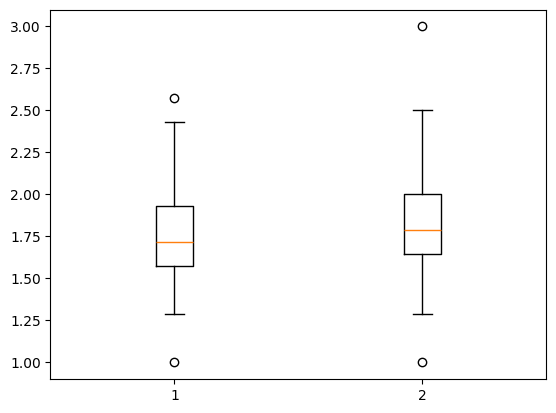

In [ ]:
# Do the same for year (freshman/sophomore, junior/senior, other)

# Convert to binary and other
print(df['Year'].value_counts())
df['Year'] = df['Year'].fillna('No Year Entry')
df['FreSop/JunSen'] = df['Year'].apply(lambda x : 'Fre/Sop' if
 (x == 'Freshman' or x == 'Sophmore') else 'Jun/Sen' if (x == 'Junior' or x == 'Senior') else 'Other')
print(df['FreSop/JunSen'].value_counts())

# See means
print(df.groupby('FreSop/JunSen')['avg_jerk_score'].mean())

# t-test
# Alternative: fre/sop score < jun/sen score
avg_score_fresop = df['avg_jerk_score'][df['FreSop/JunSen'] == 'Fre/Sop']
avg_score_junsen = df['avg_jerk_score'][df['FreSop/JunSen'] == 'Jun/Sen']
print(stats.ttest_ind(avg_score_fresop, avg_score_junsen, alternative='less'))

# Visualization
plt.boxplot([avg_score_fresop, avg_score_junsen])

In [ ]:
# Do the same for age (21 and over, under 21, other)

# Convert to binary and other
df['Age'] = df['Age'].fillna(0)
df['Age'] = df['Age'].apply(lambda x : 50 if x == '50+' else x)
df['Age'] = df['Age'].astype(int)
print(df['Age'].value_counts())

df['21+/21-'] = df['Age'].apply(lambda x : '21+' if x >= 21 else '21-' if (x < 21 and x > 0) else 'Other')
print(df['21+/21-'].value_counts())

# See means
print(df.groupby('21+/21-')['avg_jerk_score'].mean())

# t-test
# Alternative: 21+ score > 21- score
avg_score_over = df['avg_jerk_score'][df['21+/21-'] == '21+']
avg_score_under = df['avg_jerk_score'][df['21+/21-'] == '21-']
print(stats.ttest_ind(avg_score_over, avg_score_under, alternative='greater'))

Age
20    209
19    114
21     58
22     17
23     14
18     13
25      7
28      4
24      4
17      4
0       3
26      3
50      2
45      1
29      1
33      1
40      1
27      1
Name: count, dtype: int64
21+/21-
21-      340
21+      114
Other      3
Name: count, dtype: int64
21+/21-
21+      1.799789
21-      1.793476
Other    1.595238
Name: avg_jerk_score, dtype: float64
TtestResult(statistic=np.float64(0.21868099894122014), pvalue=np.float64(0.41349862727153236), df=np.float64(452.0))
